# <span style="color:blue">EVAC Workshop 3: Multi-objective evolution</span>

**Module leader**

Simon O'Keefe: simon.okeefe@york.ac.uk

**Graduate Teaching Assistants**

Danny Roberts: danny.roberts@york.ac.uk

Tianda Sun: tianda.sun@york.ac.uk

## <span style="color:#0073e6">Prerequisites</span>


Before participating in this practical make sure that you have watched the the pre-workshop materials:
- Lecture 3
- Code walkthrough 5


# <span style="color:blue">Learning Objectives</span>

* Implement individuals with different representations to lists
* Implement and then examine multi-objective evolution
* Implement the Mu + Lamda algorithm manually, as needed for NGSA II

# <span style="color:blue">The problem: the kursawe function</span>

The Kursawe function has two objectives (see two equations below) that we want to minimize. It can have an arbirtarly number *N* of input variables *xi*, which take values within the range -5 and 5.

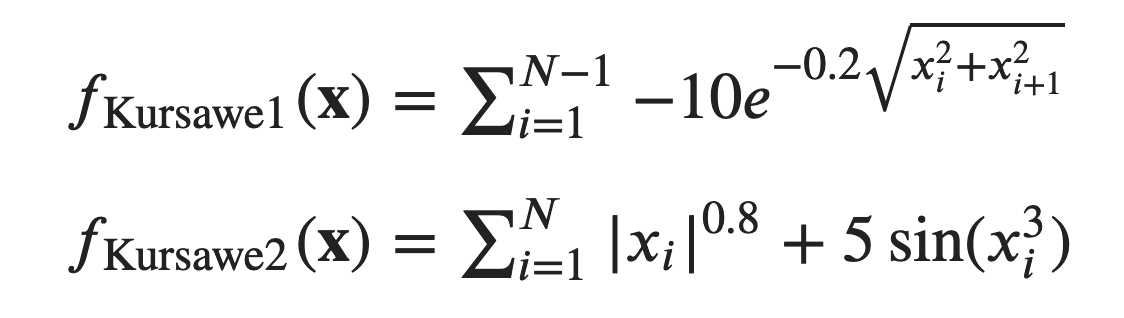

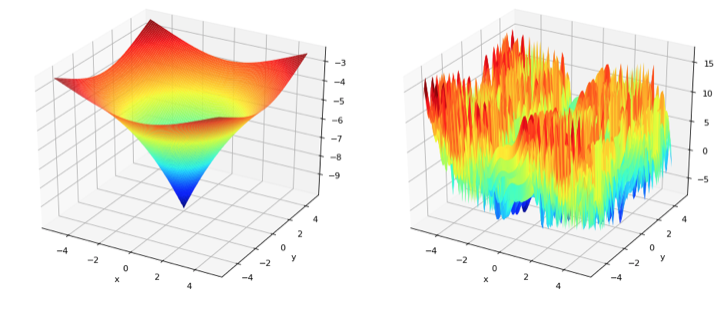

There are built-in benchmark problems in DEAP. You import them like this:

In [2]:
from deap import benchmarks

The kursawe function can be called like this:

In [3]:
exampleInputs = [-5, 2, 5]
benchmarks.kursawe(exampleInputs)

(-6.812092298638419, 13.935688996486114)

# <span style="color:blue">Task 1: Implement a multi objective GA for the kursawe function</span>

Create a GA that gives inputs that minimize the multi-objective function. For this, the number of inputs to use should be 3 to start with (which you can visualize). Then try changing it to 5.

## <span style="color:blue">GA Code Here</span>

In [4]:
NGEN = 250
CXPB = 0.5
MUTPB = 0.2
popSize = MU = 200
LAMBDA = 400
KURSAWE_INP_COUNT = 3

In [5]:
import random
from deap import base, creator, tools

creator.create("Fitness", base.Fitness, weights=(-1.0, -1.0))  # minimising both
creator.create("Individual", list, fitness=creator.Fitness)
toolbox = base.Toolbox()
toolbox.register("attr_kursawe_bounds", random.uniform, -5.0, 5.0)
toolbox.register(
    "individual",
    tools.initRepeat,
    creator.Individual,
    toolbox.attr_kursawe_bounds,
    KURSAWE_INP_COUNT,
)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.4, indpb=0.2)
toolbox.register("evaluate", benchmarks.kursawe)
toolbox.register("select", tools.selNSGA2)

In [6]:
import numpy as np

pop = toolbox.population(n=popSize)
hof = tools.ParetoFront(similar=np.allclose)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

In [7]:
from deap import algorithms

pop, log = algorithms.eaMuPlusLambda(
    pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats, halloffame=hof
)

gen	nevals	avg                      	std                    	min                        	max                      
0  	200   	[-9.74496818  5.43372589]	[2.42038967 5.81076309]	[-17.47032413  -9.0016743 ]	[-5.68205981 20.55243551]
1  	278   	[-11.93581361   0.44213946]	[2.3056696  5.09589401]	[-18.03819319  -9.0016743 ]	[-7.38589125 14.3439699 ]
2  	282   	[-13.59336031  -2.5982521 ]	[2.71870577 4.76535798]	[-18.59440595  -9.11308771]	[-7.56216494 11.5141233 ]
3  	281   	[-15.27768676  -4.18491177]	[1.97085274 3.48235244]	[-18.901521   -10.33113657]	[-9.1998238   4.16155069]
4  	255   	[-15.81750247  -4.79002314]	[1.84024063 3.46763225]	[-18.901521   -10.67968422]	[-11.02274684   1.62332093]
5  	275   	[-16.12088212  -5.43458412]	[1.70252412 3.64103435]	[-18.901521   -10.81553685]	[-10.99395836   1.41035499]
6  	286   	[-16.20313515  -6.15330678]	[1.25174436 2.78600967]	[-19.54025644 -10.84132911]	[-13.23405308   0.50570469]
7  	284   	[-16.61093088  -5.36070398]	[1.06439021 2.55212235]

## <span style="color:blue">Plot the results</span>

Be sure to plot the pareto front at the end. This is possible with the 3 arguments version of this problem. You can plot using a 3D plot in Seaborn. e.g.



You can also plot fitness in 2D using:

```sns.kdeplot(x,y)```

Text(0.5, -0.046000000000000006, 'Final population (3 inputs)')

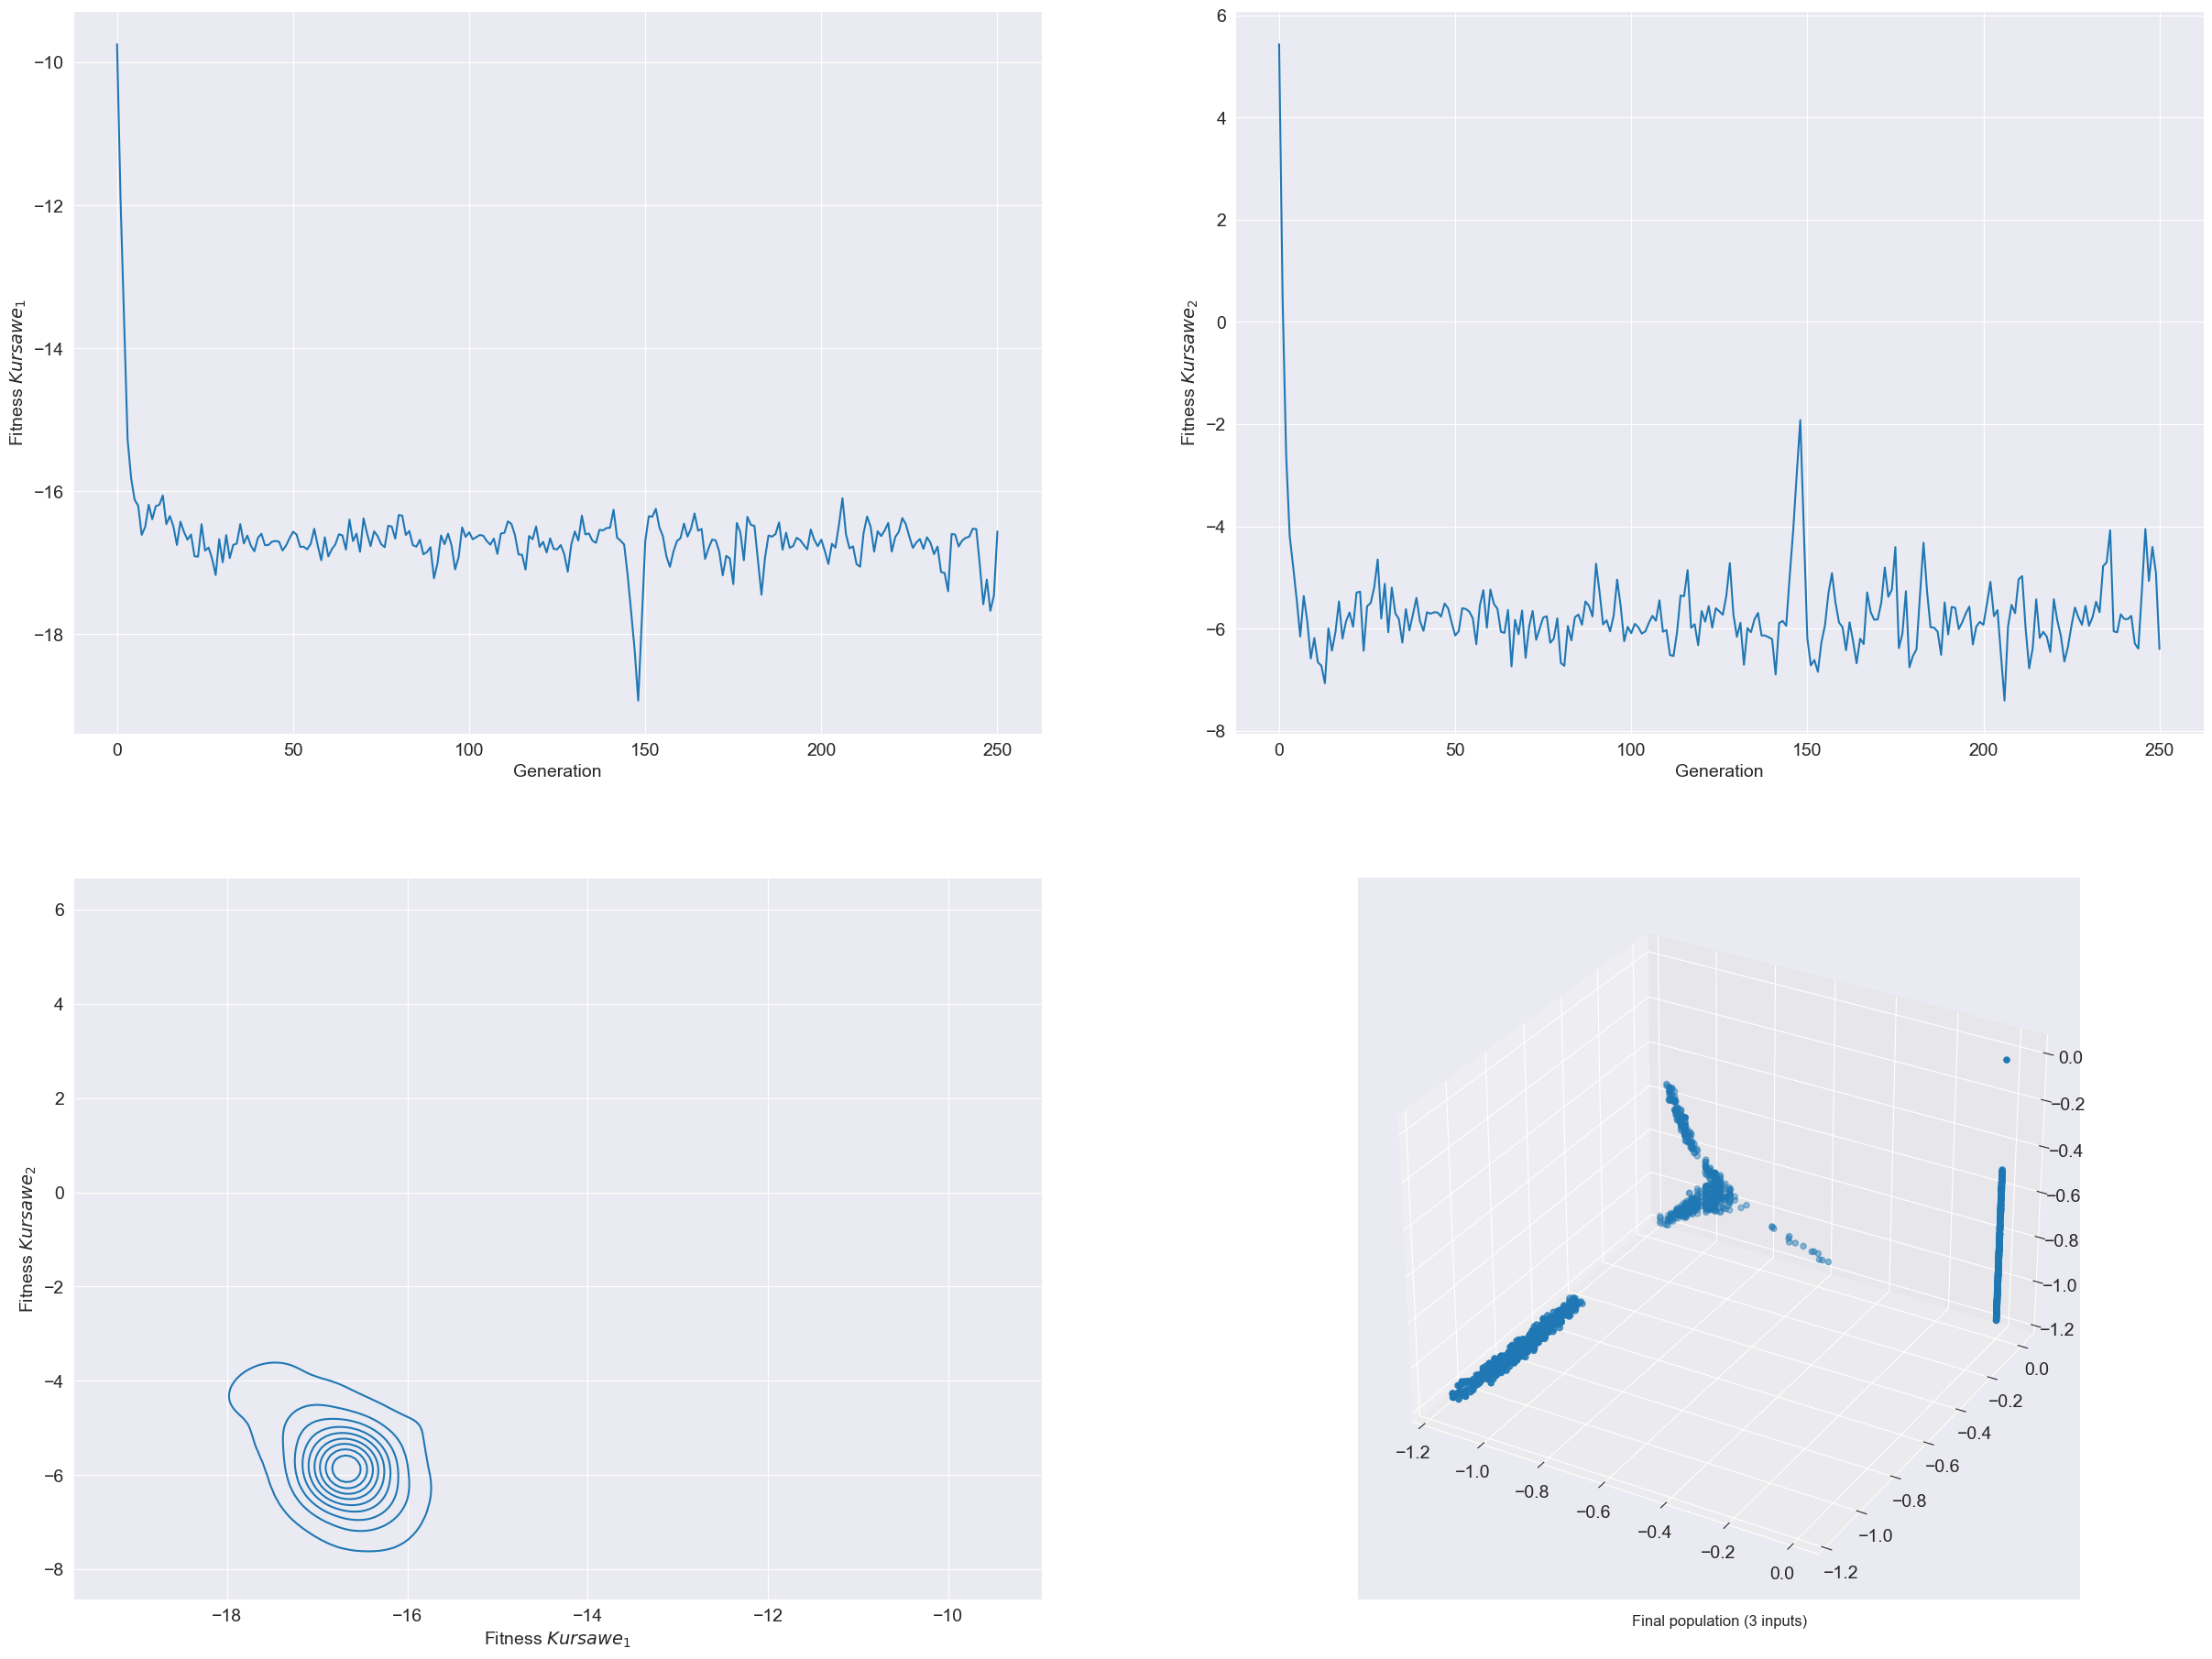

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

popnp = np.array(hof.items)
gen = log.select("gen")
avgs = log.select("avg")
stds = log.select("std")
avgs_kurs_1 = [item[0] for item in avgs]
avgs_kurs_2 = [item[1] for item in avgs]
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("legend", fontsize=14)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 6))
line1 = ax1.plot(gen, avgs_kurs_1)
line2 = ax2.plot(gen, avgs_kurs_2)
ax1.set_xlabel("Generation")
ax1.set_ylabel(r"Fitness $Kursawe_1$")
ax2.set_xlabel("Generation")
ax2.set_ylabel(r"Fitness $Kursawe_2$")
sns.kdeplot(ax=ax3, x=avgs_kurs_1, y=avgs_kurs_2)
ax3.set_xlabel(r"Fitness $Kursawe_1$")
ax3.set_ylabel(r"Fitness $Kursawe_2$")
plt.subplots_adjust(top=3.0)
ax4.remove()  # remove the 2d axis lines
ax4 = fig.add_subplot(2, 2, 4, projection="3d")
ax4.scatter(xs=popnp[:, 0], ys=popnp[:, 1], zs=popnp[:, 2], marker="o")
ax4.set_title("Final population (3 inputs)", y=-0.05)

# <span style="color:blue">Task 2: Manually Implement the Mu Plus Lambda Algorithm</span>

Based on the walkthough, you probably used the built-in Mu Plus Lambda algorithm from DEAP to implement your algorithm. Implementing an EA in this way is important for NGSA II because it ultimately selects from both the parent and a child population together. Mu plus Lamda is technically an **Evolutionary Strategy algorithm**, rather than a Genetic Algorithm, because children are produced before selection. This means you need to generate a child population first. For this, no selection is used. Instead we create a population of offspring by either replicating a parent, crossing over two parents, or replicating and then mutating a parent. These populations are then combined for selection.

You can read more about the MuPlusLamnda algorithm [here](https://deap.readthedocs.io/en/master/api/algo.html)

To produce the offspring we can use the DEAP function [algorithms.VarOR](https://deap.readthedocs.io/en/master/api/algo.html#deap.algorithms.varOr)

*(Note: The VarAnd function is also available and is a shortcut to the approach you have been manually coding before, where you perform crossover and mutation with given probabilities).*

Pseudocode for the algorithm looks like this:

evaluate(population)

for g in range(ngen):    

      offspring = varOr(population, toolbox, lambda_, cxpb, mutpb)

      evaluate(offspring)

      population = select(population + offspring, mu)

**Your task:** Implement this algorithm yourself instead of using the built-in algorithm. You will also need to update the Pareto HoF manually using hof.update(pop)

In [9]:
logbook = tools.Logbook()
pop = toolbox.population(n=popSize)

fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

stats = tools.Statistics(
    lambda ind: ind.fitness.values
)  # cannot reset the stats object so just write over it
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)
hof.clear()  # start with an empty hall of fame for this run
for g in range(NGEN):
    offspring = algorithms.varOr(pop, toolbox, LAMBDA, CXPB, MUTPB)
    fitnesses = map(toolbox.evaluate, offspring)
    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit
    pop = toolbox.select(pop + offspring, MU)
    hof.update(pop)
    record = stats.compile(pop)
    logbook.record(gen=g, **record)
    print(record.stream)

{'avg': array([-12.27175406,   1.98804647]), 'std': array([2.19293281, 4.20243592]), 'min': array([-19.10970848,  -6.97791516]), 'max': array([-7.65445514, 15.2624411 ])}
{'avg': array([-14.03876197,  -1.0793682 ]), 'std': array([2.36881403, 3.73221774]), 'min': array([-19.10970848,  -8.8881012 ]), 'max': array([-8.90502274, 10.47131841])}
{'avg': array([-15.19451145,  -2.98518481]), 'std': array([2.58531402, 3.72307468]), 'min': array([-19.21767197, -10.52246308]), 'max': array([-9.07330174,  5.88489516])}
{'avg': array([-15.81920345,  -4.64235518]), 'std': array([1.91021287, 3.13235157]), 'min': array([-19.5491729 , -10.52246308]), 'max': array([-10.71308192,   0.78205124])}
{'avg': array([-16.27043482,  -5.42468033]), 'std': array([1.48384881, 3.18956907]), 'min': array([-19.78852184, -10.60563072]), 'max': array([-13.52901769,   0.43690395])}
{'avg': array([-16.42822151,  -5.76542185]), 'std': array([1.55259191, 3.68300576]), 'min': array([-19.78852184, -11.09671592]), 'max': array

Text(0.5, -0.046000000000000006, 'Final population (3 inputs)')

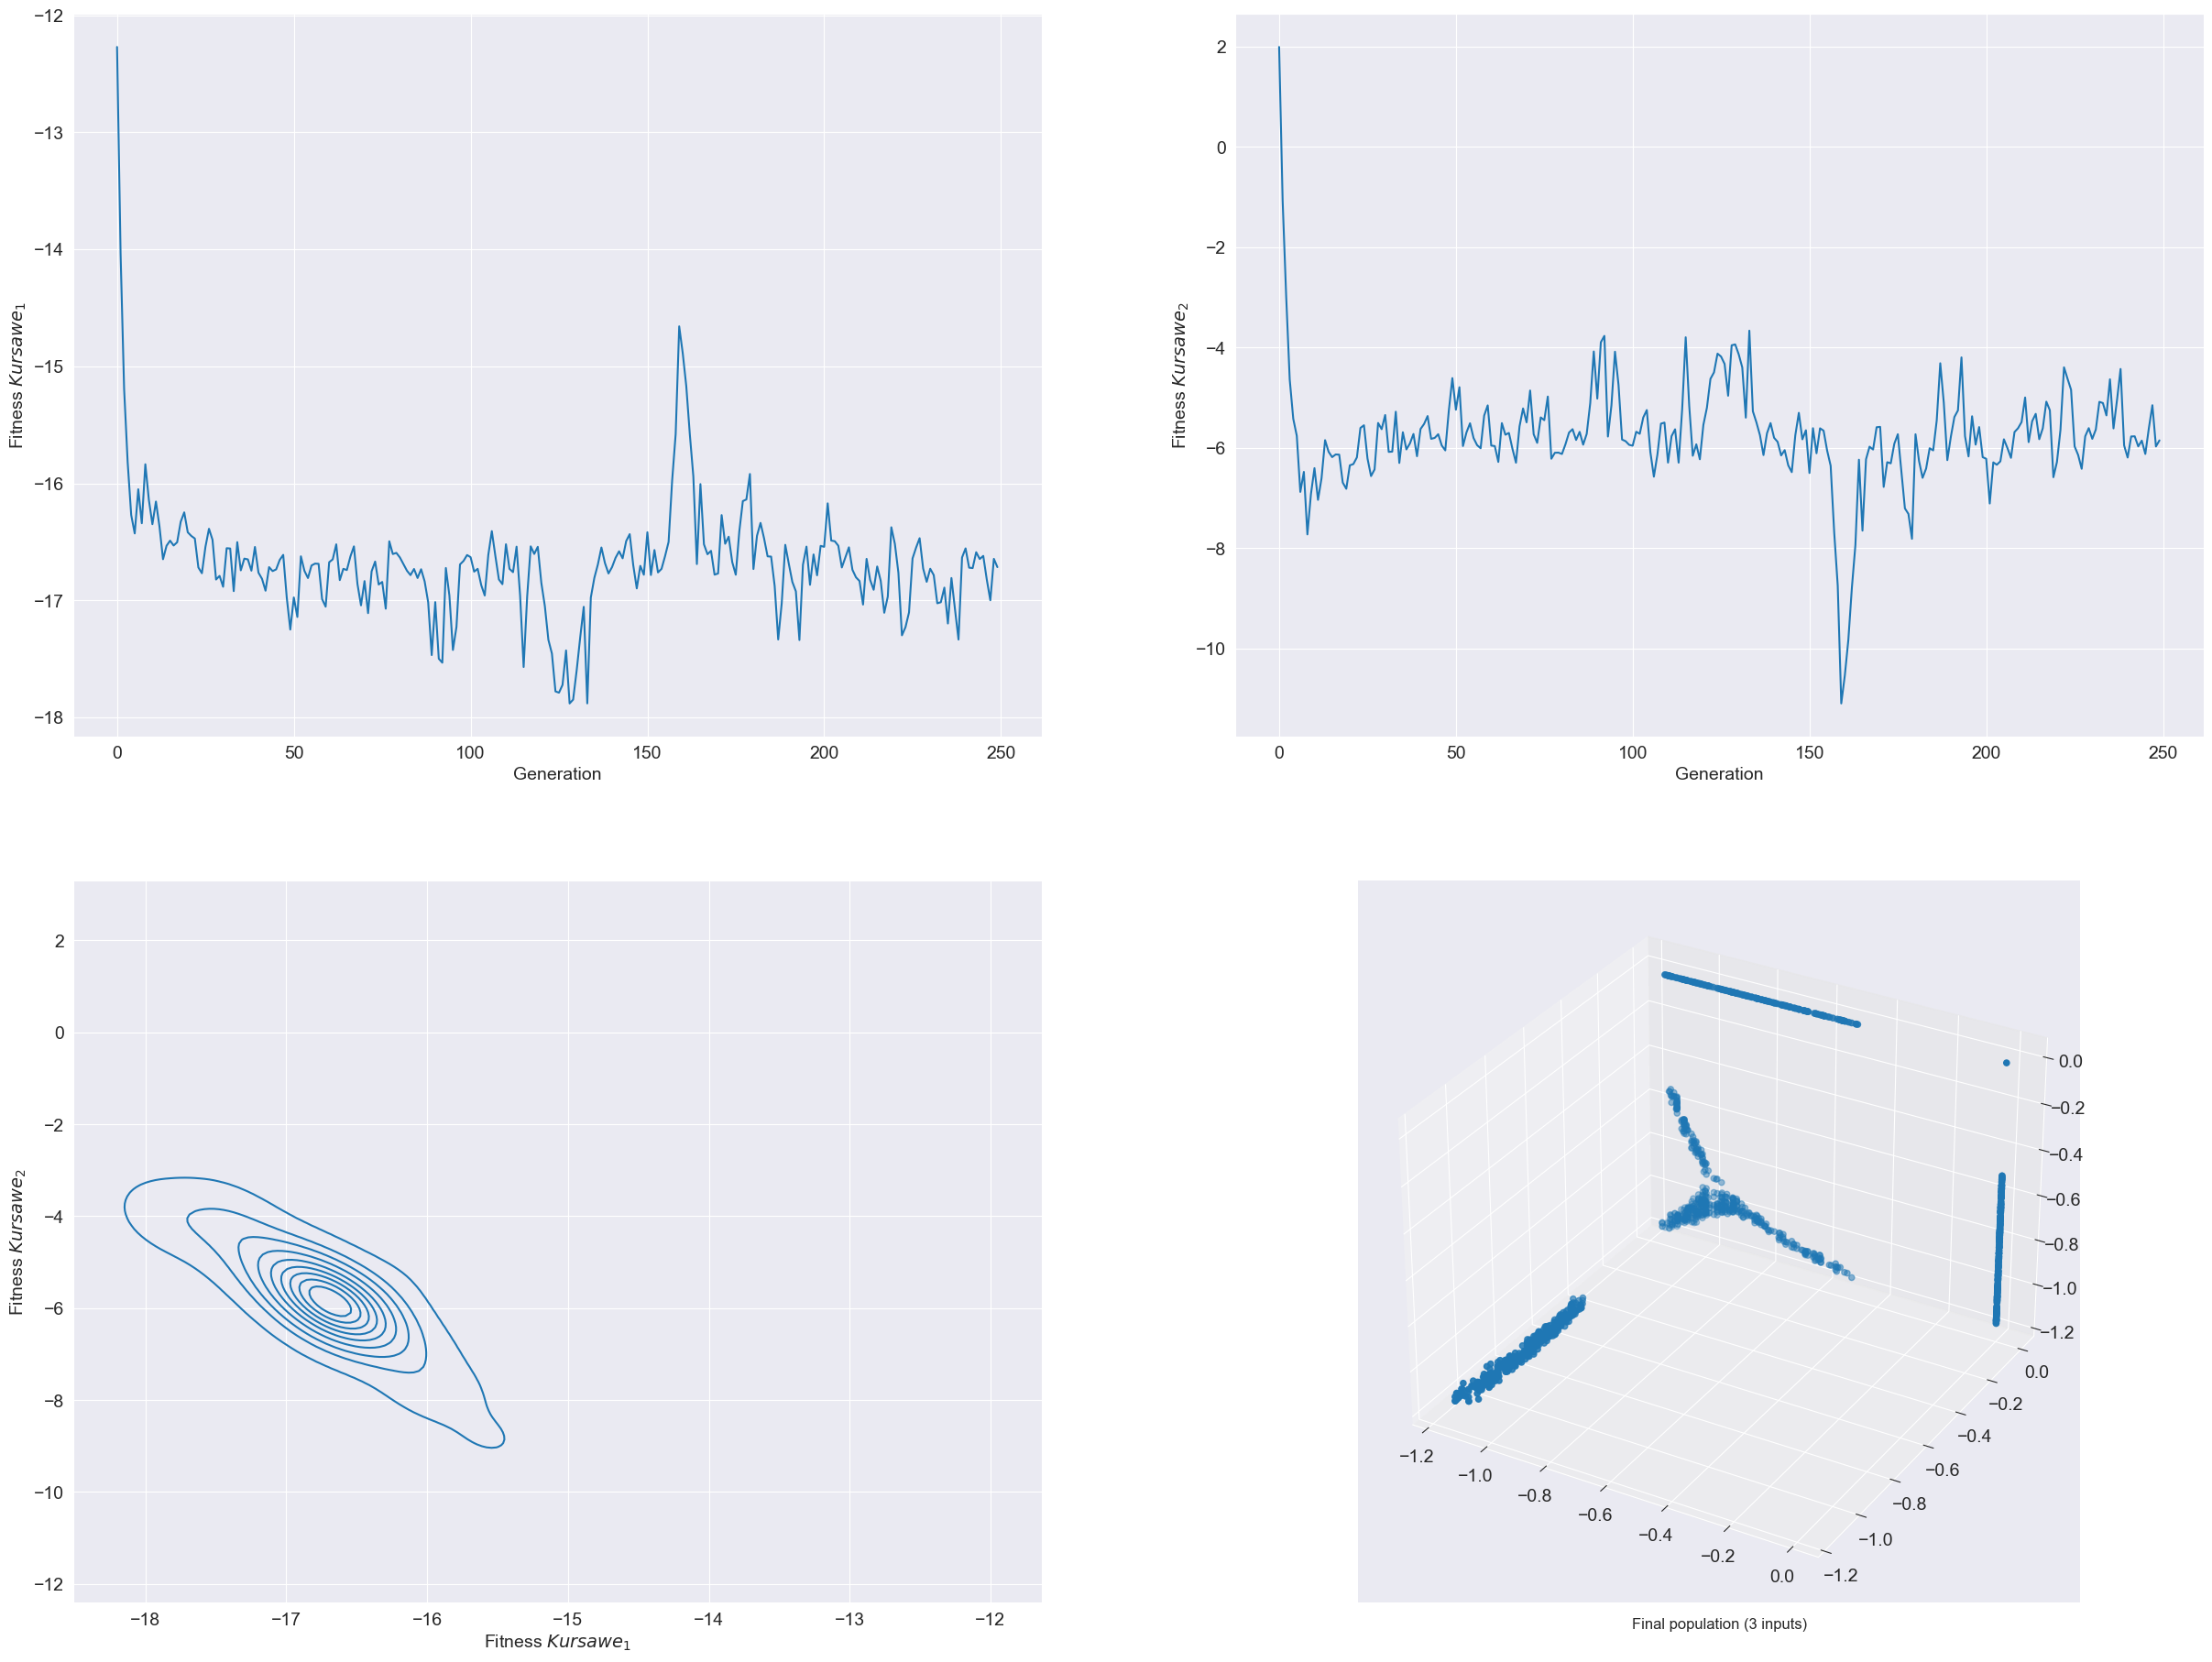

In [10]:
popnp = np.array(hof.items)
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")
avgs_kurs_1 = [item[0] for item in avgs]
avgs_kurs_2 = [item[1] for item in avgs]
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("legend", fontsize=14)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 6))
line1 = ax1.plot(gen, avgs_kurs_1)
line2 = ax2.plot(gen, avgs_kurs_2)
ax1.set_xlabel("Generation")
ax1.set_ylabel(r"Fitness $Kursawe_1$")
ax2.set_xlabel("Generation")
ax2.set_ylabel(r"Fitness $Kursawe_2$")
sns.kdeplot(ax=ax3, x=avgs_kurs_1, y=avgs_kurs_2)
ax3.set_xlabel(r"Fitness $Kursawe_1$")
ax3.set_ylabel(r"Fitness $Kursawe_2$")
plt.subplots_adjust(top=3.0)
ax4.remove()
ax4 = fig.add_subplot(2, 2, 4, projection="3d")
ax4.scatter(xs=popnp[:, 0], ys=popnp[:, 1], zs=popnp[:, 2], marker="o")
ax4.set_title("Final population (3 inputs)", y=-0.05)

# <span style="color:blue">Optional Task 3: Implement the knapsack problem using a list or numpy array instead of set</span>

To get you more used to inheriting from different data types for individuals, **your task** is to implement the knapsack problem from the accompanying walkthrough, but represent individuals with a Python dict rather than a set.  This will also require changing the mutation and crossover functions. Allow mutation to remove items from anywhere in the bag, rather than just pop from the top.

Important: If you want to use a numpy array, you must read this first:
[numpy and deap](https://deap.readthedocs.io/en/master/tutorials/advanced/numpy.html)
And for an example see this:
[numpy and deap example](https://deap.readthedocs.io/en/master/examples/ga_onemax_numpy.html?highlight=numpy)

## Let's also slightly change the problem to require each knapsack to have 3 items - this way we can visualise the pareto front

In [11]:
NBR_ITEMS = 100  # The number of items to choose from
MAX_ITEM = 50  # Max items that can be in the bag
MAX_WEIGHT = 50  # Max weight of the bag
IND_INIT_SIZE = 3  # The initial number of random items in a bag for a new individual

In [12]:
items = [
    {"name": i, "weight": random.randint(1, 10), "value": random.uniform(0, 100)}
    for i in range(NBR_ITEMS)
]

In [13]:
creator.create(
    "Fitness", base.Fitness, weights=(-1.0, 1.0)
)  # minimize weight, maximise value
creator.create("Individual", list, fitness=creator.Fitness)
toolbox = base.Toolbox()
toolbox.register("attr_item", random.randrange, NBR_ITEMS)
toolbox.register(
    "individual",
    tools.initRepeat,
    creator.Individual,
    toolbox.attr_item,
    IND_INIT_SIZE,
)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.individual()

/Users/ivanbar/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/ivanbar/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


[11, 76, 50]

In [14]:
def eval_knapsack(individual):
    weight = 0.0
    value = 0.0
    for item in individual:
        weight += items[item]["weight"]
        value += items[item]["value"]
    if len(set(individual)) != len(individual):
        return 10000, 0  # kill off sacks with repeating items
    return weight, value


def mut_knapsack(individual: list):
    """Randomly changes one of the items in the sack to a random one"""
    if random.random() < 0.5:
        individual[random.randint(0, len(individual) - 1)] = random.randrange(
            0, NBR_ITEMS
        )
    return (individual,)


def pareto_eq(ind1, ind2):
    return np.allclose(ind1.fitness.values, ind2.fitness.values)


def crossover_knapsack(ind1, ind2):
    intersection = [item for item in ind1 + ind2 if item in ind1 and item in ind2]
    difference = [item for item in ind1 + ind2 if ((item in ind1) ^ (item in ind2))]
    ind1.values = intersection
    ind2.values = difference
    return ind1, ind2


toolbox.register("evaluate", eval_knapsack)
toolbox.register("mate", crossover_knapsack)
toolbox.register("mutate", mut_knapsack)
toolbox.register("select", tools.selNSGA2)

pop = toolbox.population(n=popSize)
hof = tools.ParetoFront(similar=pareto_eq)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

In [15]:
pop, log = algorithms.eaMuPlusLambda(
    pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats, halloffame=hof
)

gen	nevals	avg                        	std                          	min    	max                            
0  	200   	[166.31       148.45253512]	[1213.52342124   53.4950496 ]	[5. 0.]	[10000.           263.29154954]
1  	292   	[ 12.805      186.37461049]	[ 5.24947378 49.19295548]    	[ 4.         28.95502214]	[ 29.         263.29154954]    
2  	274   	[ 12.275      219.15182179]	[ 6.49456504 43.76726909]    	[ 4.         62.91922315]	[ 24.         280.72581695]    
3  	289   	[ 11.395     230.2007318]  	[ 6.96699182 44.80963208]    	[ 4.         62.91922315]	[ 22.         280.72581695]    
4  	266   	[  6.02       203.89674989]	[ 2.16554843 59.41911679]    	[ 4.         62.91922315]	[ 20.         282.56639837]    
5  	268   	[  6.105      185.84752954]	[ 2.65969453 87.93830127]    	[ 4.         62.91922315]	[ 17.         282.56639837]    
6  	285   	[  5.98       151.86291384]	[ 4.19399571 78.10094001]    	[ 4.         62.91922315]	[ 17.         282.56639837]    
7  	279   	[ 10.26  

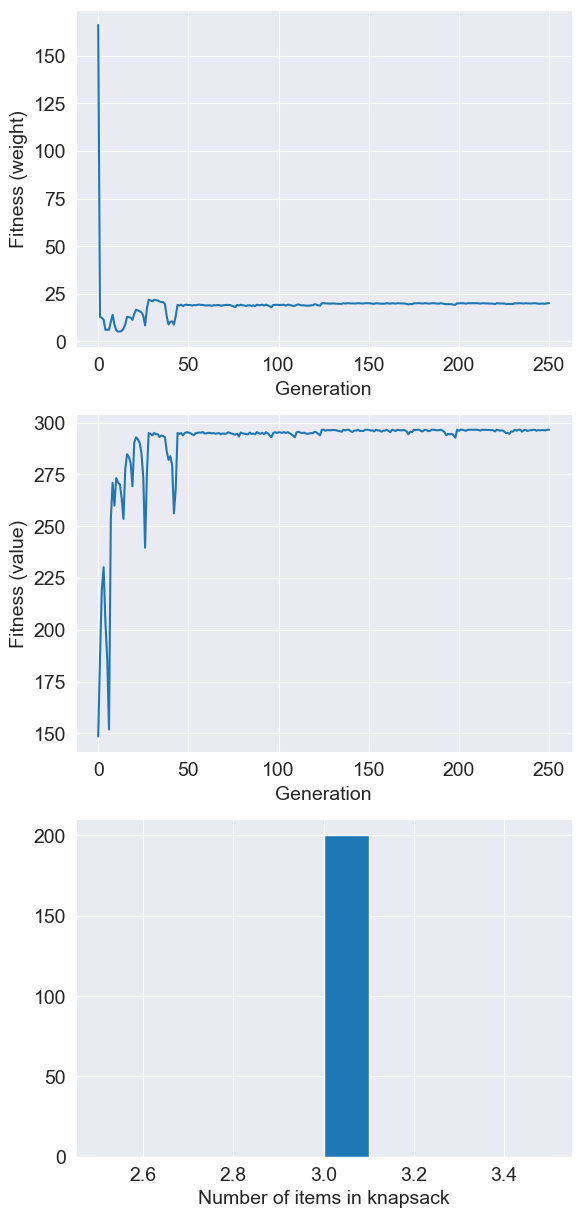

In [16]:
gen = log.select("gen")
avgs = log.select("avg")
stds = log.select("std")
avgs_weight = [item[0] for item in avgs]
avgs_value = [item[1] for item in avgs]
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness (weight)")
ax1.plot(gen, avgs_weight)
ax2.set_xlabel("Generation")
ax2.set_ylabel("Fitness (value)")
ax2.plot(gen, avgs_value)
ax3.hist([len(ind) for ind in pop])
ax3.set_xlabel("Number of items in knapsack")
plt.subplots_adjust(top=2.5)

In [19]:
best_ind = tools.selBest(pop, 1)[0]
best_weight = sum([items[item]["weight"] for item in best_ind])
best_value = sum([items[item]["value"] for item in best_ind])
print(f"Best items: {best_ind}")
print(f"Best knapsack: weight - {best_weight}, value: {best_value}")

Best items: [8, 68, 33]
Best knapsack: weight - 20, value: 296.54155569791135


Text(0.5, 0.92, 'Knapsack population(3 items)')

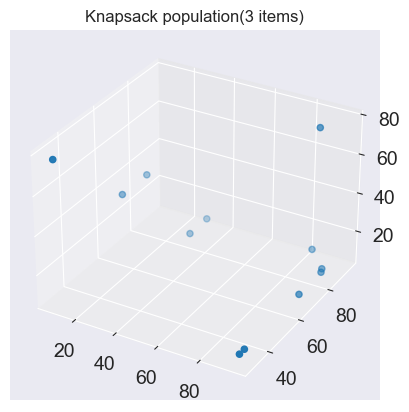

In [18]:
popnp = np.array(hof.items)
fig = plt.figure()
ax4 = fig.add_subplot(projection="3d")
ax4.scatter(popnp[:, 0], popnp[:, 1], popnp[:, 2])
ax4.set_title("Knapsack population(3 items)")

Text(0, 0.5, 'Fitness (value)')

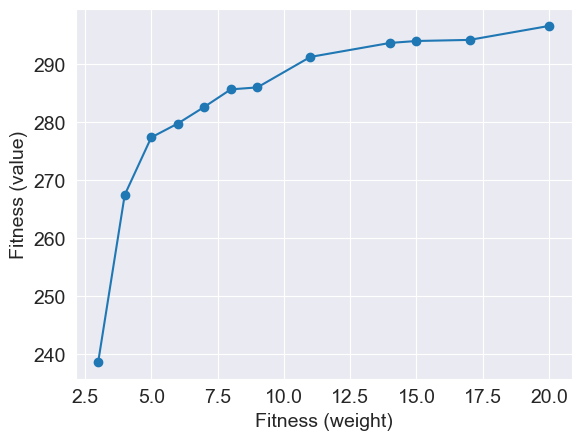

In [30]:
best_fitnesses = np.array([ind.fitness.values for ind in hof.items])
fig, ax = plt.subplots()
ax.plot(best_fitnesses[:, 0], best_fitnesses[:, 1], marker="o")
ax.set_xlabel("Fitness (weight)")
ax.set_ylabel("Fitness (value)")